In [1]:
# Import the libraries

%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 10

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
crimes_df = pd.read_csv("crime_data_edited.csv")

crimes_df = crimes_df.sample(frac=0.2)

y = crimes_df["Crime Code"]
crimes_df.drop("Crime Code", axis=1, inplace=True)

crimes_df

,Time Occurred,Victim Age,Day Occurred,Days To Report,Day of Year,Time of Day,Location Lat,Location Lng
55235,1300,0.0,Saturday,1,204,DAY,34.0967,-118.3070
214226,1,54.0,Thursday,120,244,NIGHT,34.1903,-118.3965
49433,1515,60.0,Tuesday,0,347,DAY,33.7767,-118.2413
8796,1345,36.0,Sunday,0,303,DAY,34.0398,-118.2726
77393,1930,23.0,Thursday,1,34,NIGHT,34.1530,-118.4487
...,...,...,...,...,...,...,...,...
4527,1715,50.0,Wednesday,1,152,DAY,34.0618,-118.2424
111687,1845,37.0,Tuesday,0,179,DAY,34.0038,-118.2827
209973,1930,36.0,Monday,4,360,NIGHT,34.1912,-118.5941
3422,2200,0.0,Sunday,1,114,NIGHT,34.0649,-118.2465


In [3]:
def k_plot(X, y, kseries, cross_val_func, title):
    
    result = kseries.apply(
        cross_val_func(X, y)
    )
    
    print("Minimum error of {0:.3f} at k={1}".format(result.min(), result.idxmin()))
    
    ax = result.plot(
        kind="line", title=title,
        figsize=(10,6), color="red"
    )
    
    ax.set_xlabel("k")
    ax.set_ylabel("MAE")
    
    return ax

## K Nearest Neighbors

In [4]:
import warnings
warnings.filterwarnings("ignore")

def get_cross_val_error(X, y):
    
    def cross_val_error(k=30):
        
        vec = DictVectorizer(sparse=False)
        scaler = StandardScaler()
        model = KNeighborsRegressor(n_neighbors=k, metric="manhattan")
        
        pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
        
        return np.mean(
            -cross_val_score(pipeline, X.to_dict(orient="records"), y, 
                             cv=4, scoring="neg_mean_absolute_error"))
   
    return cross_val_error

In [ ]:
krange = range(1, 101, 1)
kseries = pd.Series(
    index=krange,
    data=krange
)

Minimum error of 177.141 at k=55


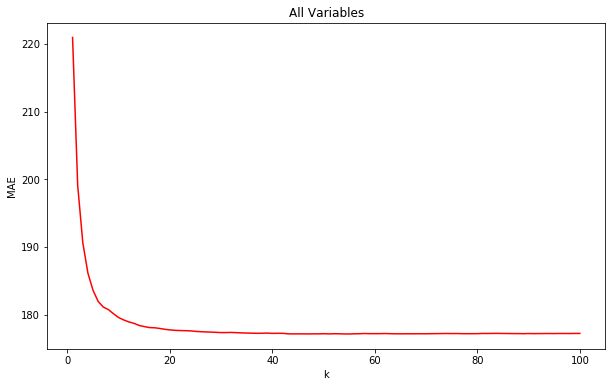

In [ ]:
ax = k_plot(crimes_df, y, kseries, get_cross_val_error, "All Variables")
ax.get_figure().savefig("kNN_plot.jpeg")

Minimum error of 175.811 at k=38


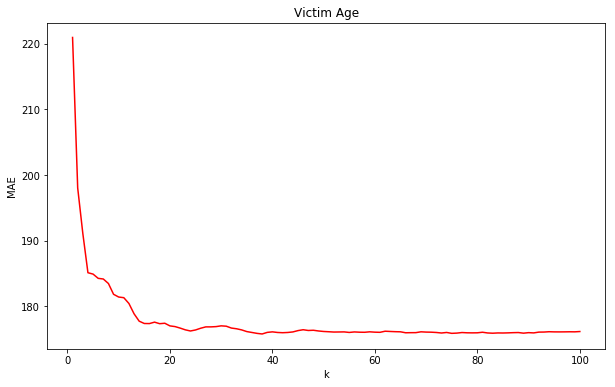

In [ ]:
k_plot(crimes_df[["Victim Age"]], y, kseries, get_cross_val_error, "Victim Age");

Minimum error of 177.470 at k=87


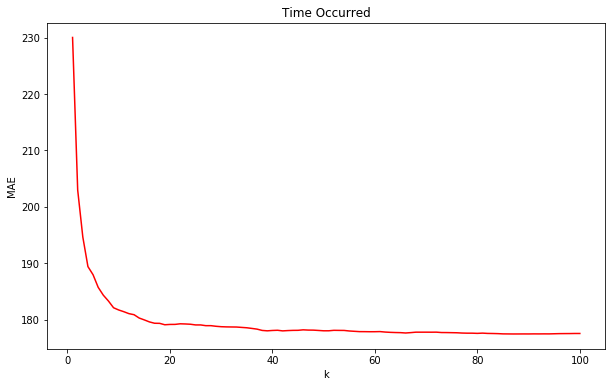

In [ ]:
k_plot(crimes_df[["Time Occurred"]], y, kseries, get_cross_val_error, "Time Occurred");

Minimum error of 176.780 at k=29


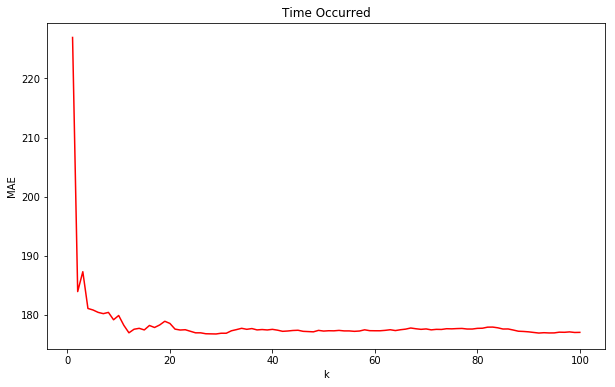

In [ ]:
k_plot(crimes_df[["Days To Report"]], y, kseries, get_cross_val_error, "Time Occurred");

Minimum error of 176.529 at k=100


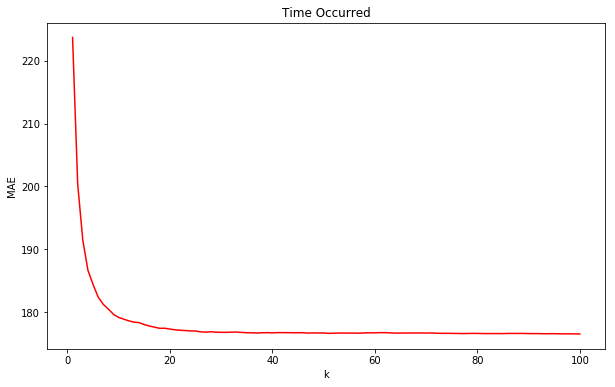

In [ ]:
k_plot(crimes_df[["Location Lat", "Location Lng"]], y, kseries, get_cross_val_error, "Time Occurred");

The results of the k nearest neighbors model reflects the lack of coherence we saw when visualizing the data. The mean absolute error when using all features is ~177. The city of LA scores crime severity from about 100 to 1000. Thus, an error of 170 suggests these features are not strong perdicts of crime severity. Furthermore, none of the individual features were strong indicators with mean absolute errors also close to 170.

## Random Forest Model

In [ ]:
def get_cross_val_error_rf(X, y):
    
    def cross_val_error_rf(k=30):
        
        vec = DictVectorizer(sparse=False)
        scaler = StandardScaler()
        model = RandomForestRegressor(n_estimators=k)
        
        pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
        
        return np.mean(
            -cross_val_score(pipeline, X.to_dict(orient="records"), y, 
                             cv=4, scoring="neg_mean_absolute_error"))
   
    return cross_val_error_rf

In [ ]:
est_range = range(1, 101, 1)

est_series = pd.Series(
    index=est_range,
    data=est_range
)

In [ ]:
ax = k_plot(crimes_df, y, est_series, get_cross_val_error_rf, "All Variables")
ax.get_figure().savefig("rf_plot.jpeg")